In [2]:
pip install alpha_vantage

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries

In [4]:
from pandas.core.groupby.groupby import Timestamp
#ScriptData Class
class ScriptData():
    #fetching data
    def fetch_intraday_data(self,script):
        ts = TimeSeries(key='T279YIRDA8MZE6YG',output_format='pandas',indexing_type='integer')
        # Get json object with the intraday data and another with  the call's metadata
        data, meta_data = ts.get_intraday(script,interval='60min', outputsize='full')
        return data
    #converting data
    def convert_intraday_data(self,script):
        df=pd.DataFrame(script)       #DataFrame
        df.rename(columns={'index':'Timestamp',
                           '1. open':'Open',
                           '2. high':'High',
                           '3. low':'Low',
                           '4. close':'Close',
                           '5. volume':'Volume'},inplace=True)
        df['Timestamp'] = pd.to_datetime(df['Timestamp'])
        df['Volume'] = df['Volume'].astype(int)
        print(df.info())
        return df

In [5]:
#Entering choice from following script
script=['GOOGL','AAPL','MSFT','TSLA']
n=int(input("Enter your choice: "))
Select=script[n]
script_data=ScriptData()
fetched_intraday_Data=script_data.fetch_intraday_data(Select)
print(fetched_intraday_Data)
fetched_converted_Data=script_data.convert_intraday_data(fetched_intraday_Data)
print(fetched_converted_Data)

Enter your choice: 1
                     index   1. open   2. high    3. low  4. close  5. volume
index                                                                        
0      2023-02-14 20:00:00  153.0800  153.0900  152.7000  152.8400    52909.0
1      2023-02-14 19:00:00  153.2000  153.2000  153.0600  153.0900    40175.0
2      2023-02-14 18:00:00  153.0800  153.2000  153.0166  153.1800   259770.0
3      2023-02-14 17:00:00  153.2000  153.2000  152.8500  153.0900  2612717.0
4      2023-02-14 16:00:00  153.2450  153.7300  152.9499  153.1000  7334349.0
...                    ...       ...       ...       ...       ...        ...
603    2022-12-20 09:00:00  131.9819  132.3309  130.2367  131.4733   282354.0
604    2022-12-20 08:00:00  131.9121  132.0317  131.2838  131.2938   114990.0
605    2022-12-20 07:00:00  131.7725  132.0816  131.7525  131.9121    15333.0
606    2022-12-20 06:00:00  131.6528  131.8223  131.5830  131.7226    16775.0
607    2022-12-20 05:00:00  131.8722  132.1

In [7]:
'GOOGL' in script

True

In [8]:
'AAPL' in script

True

In [9]:
'NVDA' in script

False

In [10]:
# Question 2

In [11]:
import numpy as np
#indicator1 function
def indicator1(df,timeperiod):
  df1=pd.DataFrame()       #DataFrame
  df1['Timestamp']=df['Timestamp']
  df1['indicator']=np.nan
  for ind in df.index:
    if ind<timeperiod:
      pass
    else:
      Average=0
      Sum=0
      for j in range(timeperiod):
        Sum+=df.loc[ind-j]['Close']      
      Average=Sum/timeperiod
      df1.at[ind,'indicator']=Average
  print(df1)
  return df1

#Taking timeperiod from user
timeperiod=int(input("Enter the timeperiod:"))
indicat=indicator1(fetched_converted_Data,timeperiod)

Enter the timeperiod:3
                Timestamp   indicator
index                                
0     2023-02-14 20:00:00         NaN
1     2023-02-14 19:00:00         NaN
2     2023-02-14 18:00:00         NaN
3     2023-02-14 17:00:00  153.120000
4     2023-02-14 16:00:00  153.123333
...                   ...         ...
603   2022-12-20 09:00:00  131.446700
604   2022-12-20 08:00:00  131.240600
605   2022-12-20 07:00:00  131.559733
606   2022-12-20 06:00:00  131.642833
607   2022-12-20 05:00:00  131.729267

[608 rows x 2 columns]


In [12]:
## Question 3

In [13]:
df2=pd.DataFrame()       #DataFrame
#Strategy class
class Strategy:
  def fetch_intraday_hist_day(self,df):
    df2['Close_data']=df['Close']
  def fetch_indicator_data(self,df):
    df2['indicator_Data']=df['indicator']
    return df2

Strate=Strategy()
Strate.fetch_intraday_hist_day(fetched_converted_Data)
Signal_Data=Strate.fetch_indicator_data(indicat)
print(Signal_Data)

       Close_data  indicator_Data
index                            
0        152.8400             NaN
1        153.0900             NaN
2        153.1800             NaN
3        153.0900      153.120000
4        153.1000      153.123333
...           ...             ...
603      131.4733      131.446700
604      131.2938      131.240600
605      131.9121      131.559733
606      131.7226      131.642833
607      131.5531      131.729267

[608 rows x 2 columns]


In [14]:
#Signal Function
def Signal_function(df3):
  signals=pd.DataFrame()      #DataFrame
  signals['timestamp']=indicat['Timestamp']
  for i in df3.index:
    if df3.loc[i]['indicator_Data']>df3.loc[i]['Close_data']:
      signals.at[i,'signal']="BUY"
    elif df3.loc[i]['indicator_Data']<df3.loc[i]['Close_data']:
      signals.at[i,'signal']="SELL"
    else:
      signals.at[i,'signal']="NO SIGNAL"
  return signals

Signal=Signal_function(Signal_Data)
print(Signal)

                timestamp     signal
index                               
0     2023-02-14 20:00:00  NO SIGNAL
1     2023-02-14 19:00:00  NO SIGNAL
2     2023-02-14 18:00:00  NO SIGNAL
3     2023-02-14 17:00:00        BUY
4     2023-02-14 16:00:00        BUY
...                   ...        ...
603   2022-12-20 09:00:00       SELL
604   2022-12-20 08:00:00       SELL
605   2022-12-20 07:00:00       SELL
606   2022-12-20 06:00:00       SELL
607   2022-12-20 05:00:00        BUY

[608 rows x 2 columns]


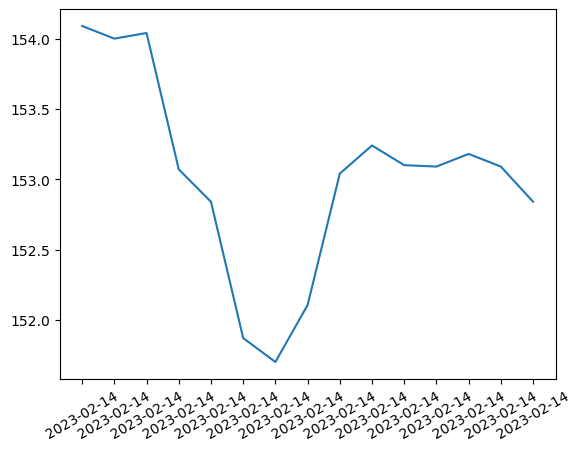

In [15]:
import matplotlib.pyplot as plt
ax=plt.subplots()
x=Signal['timestamp'].head(15)
y=Signal_Data['Close_data'].head(15)
plt.plot(x,y)
plt.xticks(x,fontsize= 10,rotation =30)
#for ind in Signal.index():
#  if Signal['signal']=='BUY':
#    plt.xticks(Signal.loc[ind]['timestamp'],fontsize= 15,rotation =30,facecolor='PINK')
#  elif Signal['signal']=='SELL':
#    plt.xticks(Signal.loc[ind]['timestamp'],fontsize= 15,rotation =30,color='BLUE')
#  else:
#    plt.xticks(Signal.loc[ind]['timestamp'],fontsize= 15,rotation =30,color='YELLOW')
plt.show()

In [16]:
def get_signal(Signal):
  B_or_S= pd.DataFrame()
  i=0
  for ind in Signal.index:
    B_or_S = Signal[(Signal['signal'] == 'BUY') | (Signal['signal'] == 'SELL')]
    return B_or_S
got_signal=get_signal(Signal)
print(got_signal)

                timestamp signal
index                           
3     2023-02-14 17:00:00    BUY
4     2023-02-14 16:00:00    BUY
5     2023-02-14 15:00:00   SELL
6     2023-02-14 14:00:00    BUY
7     2023-02-14 13:00:00    BUY
...                   ...    ...
603   2022-12-20 09:00:00   SELL
604   2022-12-20 08:00:00   SELL
605   2022-12-20 07:00:00   SELL
606   2022-12-20 06:00:00   SELL
607   2022-12-20 05:00:00    BUY

[603 rows x 2 columns]


In [17]:
## Question 4

In [19]:
pip install pyalgotrading

Note: you may need to restart the kernel to use updated packages.
